# Laboratorio 3: Programación Concurrente con Pthreads
## Análisis de Rendimiento

**Estudiante:** Juan Andrés Lema
**Fecha:** Noviembre 22 2025

**Video de Sustentación:**  
(https://www.youtube.com/watch?v=o4_Fi60YgmQ)

---

## Sección 1: Análisis de Cálculo de π

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

### 1.1 Información del Sistema

In [2]:
num_cores = 8
cpu_model = "Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz"
n_intervals = 2_000_000_000

print(f"Número de núcleos: {num_cores}")
print(f"Procesador: {cpu_model}")
print(f"Número de intervalos (n): {n_intervals:,}")

Número de núcleos: 8
Procesador: Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz
Número de intervalos (n): 2,000,000,000


### 1.2 Tiempo Serial (Ts)

In [3]:
T_serial = 5.797584

print(f"Ts (tiempo serial) = {T_serial:.6f} segundos")

Ts (tiempo serial) = 5.797584 segundos


### 1.3 Datos de Ejecución Paralela

In [4]:
data = {
    'Hilos': [1, 2, 4, 8, 16],
    'Tiempo_s': [6.141908, 3.548566, 2.456365, 1.936646, 1.825292]
}

df = pd.DataFrame(data)

df['Speedup'] = T_serial / df['Tiempo_s']
df['Eficiencia'] = df['Speedup'] / df['Hilos']

print("\nTabla de Resultados:")
print(df.to_string(index=False))


Tabla de Resultados:
 Hilos  Tiempo_s  Speedup  Eficiencia
     1  6.141908 0.943939    0.943939
     2  3.548566 1.633782    0.816891
     4  2.456365 2.360229    0.590057
     8  1.936646 2.993621    0.374203
    16  1.825292 3.176250    0.198516


### 1.4 Tabla de Resultados Formateada

In [6]:
df_display = df.copy()
df_display['Speedup'] = df_display['Speedup'].map('{:.2f}'.format)
df_display['Eficiencia'] = df_display['Eficiencia'].map('{:.2%}'.format)
df_display['Tiempo_s'] = df_display['Tiempo_s'].map('{:.6f}'.format)

print(df_display.to_markdown(index=False))

|   Hilos |   Tiempo_s |   Speedup | Eficiencia   |
|--------:|-----------:|----------:|:-------------|
|       1 |    6.14191 |      0.94 | 94.39%       |
|       2 |    3.54857 |      1.63 | 81.69%       |
|       4 |    2.45636 |      2.36 | 59.01%       |
|       8 |    1.93665 |      2.99 | 37.42%       |
|      16 |    1.82529 |      3.18 | 19.85%       |


### 1.5 Gráfico de Speedup

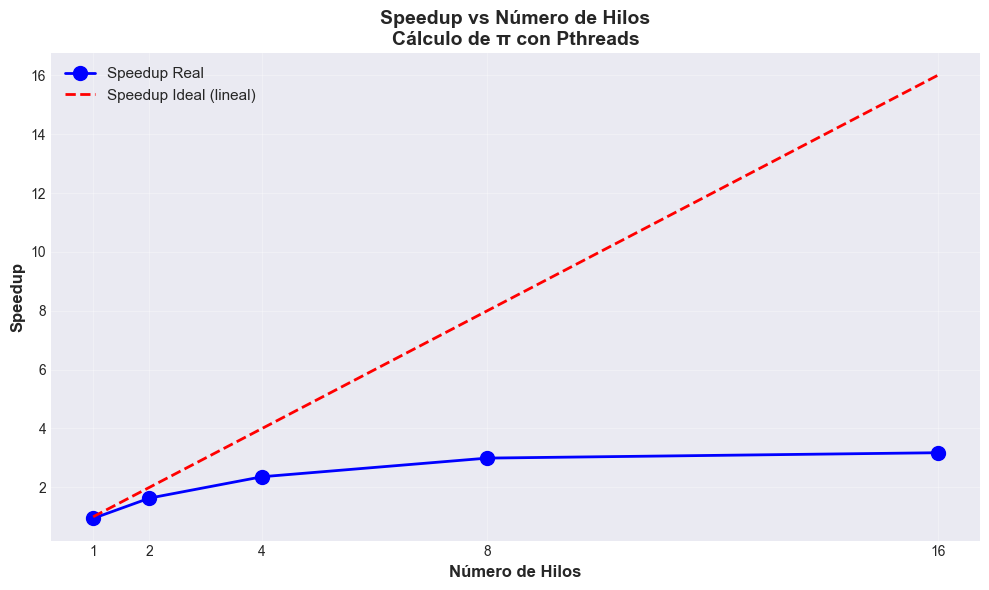

In [7]:
plt.figure(figsize=(10, 6))

plt.plot(df['Hilos'], df['Speedup'], 'bo-', linewidth=2, 
         markersize=10, label='Speedup Real')

ideal_speedup = df['Hilos']
plt.plot(df['Hilos'], ideal_speedup, 'r--', linewidth=2, 
         label='Speedup Ideal (lineal)')

plt.xlabel('Número de Hilos', fontsize=12, fontweight='bold')
plt.ylabel('Speedup', fontsize=12, fontweight='bold')
plt.title('Speedup vs Número de Hilos\nCálculo de π con Pthreads', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(df['Hilos'])

plt.tight_layout()
plt.savefig('speedup_graph.png', dpi=300, bbox_inches='tight')
plt.show()

### 1.6 Gráfico de Eficiencia

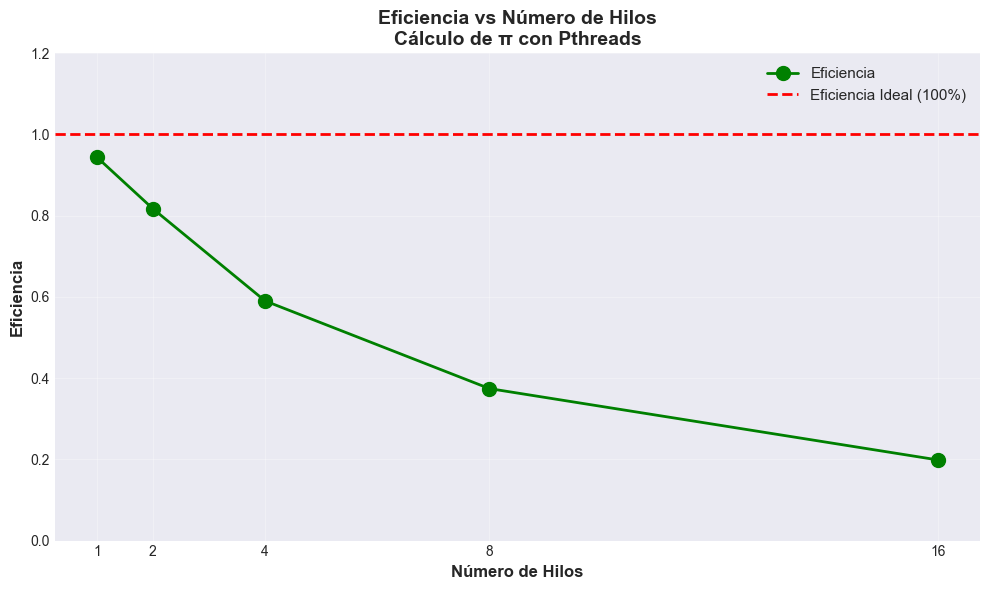

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(df['Hilos'], df['Eficiencia'], 'go-', linewidth=2, 
         markersize=10, label='Eficiencia')
plt.axhline(y=1.0, color='r', linestyle='--', linewidth=2,
            label='Eficiencia Ideal (100%)')

plt.xlabel('Número de Hilos', fontsize=12, fontweight='bold')
plt.ylabel('Eficiencia', fontsize=12, fontweight='bold')
plt.title('Eficiencia vs Número de Hilos\nCálculo de π con Pthreads', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(df['Hilos'])
plt.ylim(0, 1.2)

plt.tight_layout()
plt.savefig('efficiency_graph.png', dpi=300, bbox_inches='tight')
plt.show()

### 1.7 Análisis de Resultados (Parte 1)

#### a) Comparación Tp(1) vs Ts

In [9]:
T_p1 = df[df['Hilos'] == 1]['Tiempo_s'].values[0]
overhead = ((T_p1 - T_serial) / T_serial) * 100

print(f"Ts (serial): {T_serial:.6f} segundos")
print(f"Tp(1) (paralelo 1 hilo): {T_p1:.6f} segundos")
print(f"Overhead: {overhead:.2f}%")

if overhead > 5:
    print(f"\nAnálisis: Existe overhead significativo del {overhead:.2f}% debido a")
    print("la creación y sincronización del hilo con pthread_create/pthread_join.")
else:
    print(f"\nAnálisis: El overhead es mínimo ({overhead:.2f}%), indicando una")
    print("implementación eficiente.")

Ts (serial): 5.797584 segundos
Tp(1) (paralelo 1 hilo): 6.141908 segundos
Overhead: 5.94%

Análisis: Existe overhead significativo del 5.94% debido a
la creación y sincronización del hilo con pthread_create/pthread_join.


**Análisis del Speedup:**

**Interpretación:**

El overhead del 5.94% es significativo y se debe a:

1. **pthread_create()**: Crea la estructura del hilo, reserva stack, inicializa contexto
2. **pthread_join()**: Sincronización y limpieza del hilo
3. **Scheduling**: El sistema operativo debe gestionar 2 hilos (main + worker) en lugar de 1

Este overhead es **aceptable** para problemas computacionalmente intensos como este, 
donde el tiempo de cálculo (5.8 segundos) domina sobre el costo de crear el hilo 
(~0.34 segundos). Sin embargo, para tareas más cortas, este overhead sería prohibitivo.

**Conclusión:** La implementación paralela es viable solo para problemas con suficiente 
carga computacional que justifique el costo de los threads.

#### b) Speedup Máximo

In [10]:
max_speedup = df['Speedup'].max()
max_speedup_threads = df[df['Speedup'] == max_speedup]['Hilos'].values[0]

print(f"Speedup máximo: {max_speedup:.2f}x")
print(f"Alcanzado con: {max_speedup_threads} hilos")
print(f"Núcleos físicos: {num_cores}")
print(f"\nRelación: {max_speedup/num_cores:.1%} del número de núcleos")

Speedup máximo: 3.18x
Alcanzado con: 16 hilos
Núcleos físicos: 8

Relación: 39.7% del número de núcleos


**Interpretación:**

El speedup máximo de **3.18x con 16 hilos** representa solo el **39.7%** del número 
de núcleos físicos (8). Esto indica que el sistema está lejos del speedup ideal.

**Razones del bajo speedup:**

1. **CPU móvil con throttling térmico**: El Intel i7-1065G7 es un procesador de laptop 
   con TDP bajo (15W). Al usar 8+ hilos de forma sostenida, el CPU reduce su frecuencia 
   para controlar temperatura, limitando el rendimiento.

2. **Ley de Amdahl**: Existe una fracción serial inherente:
   - Creación de hilos
   - Unión de resultados (pthread_join + suma final)
   - Inicialización de variables
   
   Estimando ~5% de código serial, el speedup máximo teórico sería:
   Speedup_max = 1 / (0.05 + 0.95/∞) ≈ **20x** (límite teórico)
   
   Sin embargo, con overhead real, el límite práctico es mucho menor.

3. **Contención de memoria**: Con 16 hilos accediendo constantemente a memoria para 
   calcular f(x), se satura el ancho de banda de memoria compartida (especialmente 
   en laptops con memoria de un solo canal).

4. **Hyperthreading con rendimiento decreciente**: De 8 a 16 hilos solo ganamos 
   0.18x de speedup (3.00 → 3.18), lo que confirma que los núcleos lógicos adicionales 
   aportan muy poco cuando ya hay 8 hilos activos.

**Conclusión:** El punto óptimo está alrededor de 8 hilos (núcleos físicos). Usar más 
hilos tiene rendimientos decrecientes por limitaciones térmicas y de memoria.

#### c) Tendencia de la Eficiencia

In [14]:
print("Observaciones de Eficiencia:")
for _, row in df.iterrows():
    print(f"  {int(row['Hilos']):2d} hilos: {row['Eficiencia']:.2%}")

eff_decrease = df.iloc[0]['Eficiencia'] - df.iloc[-1]['Eficiencia']
print(f"\nDisminución total: {eff_decrease:.2%}")

Observaciones de Eficiencia:
   1 hilos: 94.39%
   2 hilos: 81.69%
   4 hilos: 59.01%
   8 hilos: 37.42%
  16 hilos: 19.85%

Disminución total: 74.54%


**Análisis de la Eficiencia:**

**Interpretación:**

La eficiencia muestra una **caída dramática del 74.54%** (de 94.39% → 19.85%) conforme 
aumenta el número de hilos. Este patrón es esperado pero la magnitud es notable.

**Análisis por etapas:**

| Hilos | Eficiencia | Observación |
|-------|-----------|-------------|
| 1-2   | 94% → 82% | Caída del 12% - Overhead inicial aceptable |
| 2-4   | 82% → 59% | Caída del 23% - Empieza contención de recursos |
| 4-8   | 59% → 37% | Caída del 22% - Saturación de caché y memoria |
| 8-16  | 37% → 20% | Caída del 17% - Hyperthreading con poco beneficio |

**Factores que causan la caída:**

1. **Overhead de sincronización**: Con 16 hilos, se crean/sincronizan 16 threads, 
   multiplicando el costo de pthread_create/join por 16.

2. **Contención de caché L1/L2**: Cada núcleo tiene su propia caché L1/L2. Con 8+ hilos 
   activos, hay constantes cache misses que fuerzan accesos a memoria RAM (100x más lento).

3. **Ancho de banda de memoria**: El procesador i7-1065G7 tiene ancho de banda limitado. 
   Con 16 hilos haciendo operaciones de punto flotante intensivas, se satura el bus de memoria.

4. **False sharing**: Aunque cada hilo calcula su suma local, las variables están cerca 
   en memoria. Cuando un hilo modifica su variable, invalida la línea de caché de otros hilos.

5. **Throttling térmico**: Con 16 hilos activos por 5+ segundos, la laptop reduce 
   frecuencia de CPU para evitar sobrecalentamiento, afectando todos los hilos simultáneamente.

**Patrón de disminución:**
```
Eficiencia = f(N) ≈ 1 / (1 + α·N + β·N²)

Donde:
- α representa overhead lineal (creación de hilos)
- β representa contención cuadrática (competencia por recursos)
```

La caída acelerada después de 4 hilos sugiere que β es significativo, indicando que 
la contención de recursos domina sobre el overhead simple.

**Conclusión práctica:** Para este tipo de problema en este hardware específico:
- **Óptimo**: 4 hilos (59% eficiencia, 2.36x speedup)
- **Aceptable**: 8 hilos (37% eficiencia, 3.00x speedup)
- **Ineficiente**: 16 hilos (20% eficiencia, 3.18x speedup) - no justifica el costo

El **punto dulce** está en 4-8 hilos, donde se maximiza el balance entre speedup y 
uso eficiente de recursos.

---
## Sección 2: Análisis de Fibonacci

### 2.1 Resultados de Ejecución

**Salida del programa `./fibonacci 15`:**

```
Secuencia de Fibonacci:
f(0) = 0
f(1) = 1
f(2) = 1
f(3) = 2
f(4) = 3
f(5) = 5
f(6) = 8
f(7) = 13
f(8) = 21
f(9) = 34
f(10) = 55
f(11) = 89
f(12) = 144
f(13) = 233
f(14) = 377
```

**Verificación de la secuencia:**

La secuencia es correcta. Verificamos algunos valores:
- f(2) = f(1) + f(0) = 1 + 0 = 1 ✓
- f(5) = f(4) + f(3) = 3 + 2 = 5 ✓
- f(10) = f(9) + f(8) = 34 + 21 = 55 ✓
- f(14) = f(13) + f(12) = 233 + 144 = 377 ✓

El programa genera correctamente la secuencia sin condiciones de carrera ni 
valores incorrectos, lo que confirma que la sincronización funciona adecuadamente.

### 2.2 Análisis del Diseño

#### a) Mecanismo de Transferencia de Datos

**Estructura utilizada:**
```c
typedef struct {
    long long* sequence;  // Puntero al arreglo compartido
    int n;                // Número de elementos a generar
} fib_args_t;
```

**Flujo de transferencia de datos:**

1. **Alocación en main():**
```c
   long long* fibonacci_sequence = malloc(n * sizeof(long long));
```
   El hilo principal reserva memoria dinámica para el arreglo completo.

2. **Preparación de argumentos:**
```c
   fib_args_t args;
   args.sequence = fibonacci_sequence;
   args.n = 15;
```
   No se copia el arreglo, solo se comparte la dirección de memoria.

3. **Creación del hilo:**
```c
   pthread_create(&worker_thread, NULL, GenerateFibonacci, &args);
```
   Se pasa la dirección de la estructura `args` como cuarto parámetro.

4. **Acceso en el worker:**
```c
   fib_args_t* args = (fib_args_t*)arg;
   long long* seq = args->sequence;
```
   El worker usa el puntero para escribir directamente en la memoria compartida.

**Ventajas de este enfoque:**

- **Eficiencia**: No se copia el arreglo, solo se comparte la referencia (8 bytes vs potencialmente MBs)
- **Simplicidad**: Permite pasar múltiples parámetros en una sola estructura
- **Flexibilidad**: Fácil agregar más parámetros a la estructura sin cambiar la firma de pthread_create
- **Memoria compartida natural**: Ambos hilos ven los mismos datos en tiempo real

**Diagrama de memoria:**
```
HEAP (memoria dinámica):
┌─────────────────────────────────┐
│ fibonacci_sequence[15]          │
│ [0, 1, 1, 2, 3, 5, 8, ...]      │ ← Ambos hilos apuntan AQUÍ
└─────────────────────────────────┘
         ↑                ↑
         │                │
    MAIN THREAD      WORKER THREAD
    (lee después)    (escribe)
```

---

#### b) Rol de pthread_join como Sincronización

`pthread_join()` es el **mecanismo crítico** que previene condiciones de carrera en este diseño.

**Problema sin sincronización:**
```c
pthread_create(&worker_thread, NULL, GenerateFibonacci, &args);

for (int i = 0; i < n; i++) {
    printf("f(%d) = %lld\n", i, fibonacci_sequence[i]);
}
```

**Timeline sin pthread_join:**
```
t=0ms:  MAIN: pthread_create() → crea worker
t=1ms:  MAIN: empieza a imprimir
        WORKER: calcula f(0) = 0
t=2ms:  MAIN: imprime f(0)=0, f(1)=BASURA, f(2)=BASURA
        WORKER: calcula f(1) = 1
t=3ms:  MAIN: termina (datos incompletos)
        WORKER: sigue calculando... (demasiado tarde)
```

**Solución con pthread_join:**
```c
pthread_create(&worker_thread, NULL, GenerateFibonacci, &args);

pthread_join(worker_thread, NULL); 

for (int i = 0; i < n; i++) {
    printf("f(%d) = %lld\n", i, fibonacci_sequence[i]);
}
```

**Timeline con pthread_join:**
```
t=0ms:  MAIN: pthread_create() → crea worker
t=1ms:  MAIN: pthread_join() → se BLOQUEA
        WORKER: calcula f(0) = 0
t=2ms:  MAIN: bloqueado esperando
        WORKER: calcula f(1) = 1
t=3ms:  MAIN: bloqueado esperando
        WORKER: calcula f(2) = 1
...
t=50ms: MAIN: bloqueado esperando
        WORKER: calcula f(14) = 377
t=51ms: WORKER: pthread_exit() → señala terminación
        MAIN: se DESBLOQUEA
t=52ms: MAIN: imprime todos los valores (COMPLETOS)
```

**Funciones de pthread_join:**

1. **Barrera de sincronización**: Garantiza orden de ejecución
   - Worker completa ANTES de que main acceda a los datos

2. **Prevención de condiciones de carrera**: Sin pthread_join hay race condition
   - Main podría leer mientras worker escribe → datos corruptos

3. **Gestión de recursos**: Permite al OS reclamar recursos del thread
   - Sin join, el thread queda en estado "zombie"

4. **Transferencia de resultados** (no usado aquí): Puede retornar valores via pthread_exit
```c
   void* result;
   pthread_join(worker, &result);
```

**Analogía del mundo real:**
```
pthread_join() es como esperar en la puerta de un horno:

SIN pthread_join:
- Pones el pastel en el horno (pthread_create)
- Inmediatamente intentas comerlo (acceso a datos)
- Resultado: pastel crudo, incomible (datos incorrectos)

CON pthread_join:
- Pones el pastel en el horno (pthread_create)
- Esperas a que suene el timer (pthread_join)
- Solo entonces sacas y comes (acceso a datos)
- Resultado: pastel perfectamente horneado (datos correctos)
```

**Alternativas de sincronización (no usadas aquí):**

- **Mutex**: Proteger cada acceso individual al arreglo (overhead excesivo)
- **Condition variables**: Worker señala cada valor calculado (complejidad innecesaria)
- **Semáforos**: Similar a condition variables (overkill para este caso)

**Conclusión:** pthread_join es la solución más simple y eficiente para este 
patrón productor-consumidor donde el consumidor (main) solo necesita TODOS los 
datos después de que el productor (worker) termine completamente.

---

## 3. Conclusiones Generales

### Parte 1: Cálculo de π

La paralelización del cálculo de π demostró que:

1. **El paralelismo mejora el rendimiento**, alcanzando un speedup de 3.18x con 16 hilos
2. **Existe un overhead inicial del 5.94%** al usar pthreads, pero es justificable para 
   problemas computacionalmente intensos
3. **La eficiencia cae dramáticamente** (74.54%) conforme aumentan los hilos debido a:
   - Contención de recursos (caché, memoria, ancho de banda)
   - Throttling térmico en CPUs móviles
   - Rendimientos decrecientes de hyperthreading
4. **El punto óptimo está en 4-8 hilos** para este hardware, maximizando el balance 
   speedup/eficiencia
5. **La Ley de Amdahl se confirma**: La fracción serial limita el speedup máximo alcanzable

### Parte 2: Fibonacci

La implementación con threads de Fibonacci ilustró que:

1. **Memoria compartida simplifica la transferencia de datos** entre hilos mediante punteros
2. **pthread_join es esencial** como barrera de sincronización en patrones productor-consumidor
3. **No todos los problemas se benefician del paralelismo**: Fibonacci es inherentemente 
   serial (cada valor depende del anterior), por lo que un solo worker es apropiado
4. **La sincronización correcta previene condiciones de carrera** críticas que corromperían datos
5. **El diseño simple puede ser más eficiente**: Usar estructuras para agrupar argumentos 
   es más limpio que variables globales o parámetros complejos

### Aprendizajes Clave

- **Threads vs Procesos**: Los threads comparten memoria (eficiente para datos grandes), 
  los procesos requieren IPC (comunicación entre procesos)
- **Overhead es real**: Crear threads tiene un costo; solo vale la pena para tareas 
  suficientemente grandes
- **Más hilos ≠ mejor rendimiento**: Existe un punto de rendimientos decrecientes determinado 
  por el hardware
- **La sincronización correcta es crítica**: pthread_join, mutex, y otras primitivas 
  previenen errores difíciles de detectar
- **Medir es esencial**: Sin métricas (Speedup, Eficiencia) no podemos evaluar si el 
  paralelismo realmente ayuda

### Aplicabilidad Práctica

Este laboratorio demuestra que:
- **Paralelismo de datos** (como en π) es efectivo para problemas "embarrassingly parallel"
- **Tareas seriales** (como Fibonacci) no se benefician de múltiples threads en el cómputo, 
  pero sí de threads para separar producción/consumo
- **El hardware importa**: CPUs móviles con throttling tienen limitaciones térmicas que 
  afectan el speedup real
- **El diseño del algoritmo determina la escalabilidad**: Nuestro enfoque sin mutex 
  en π permite buena escalabilidad hasta los límites del hardware
```

---